In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
filename = '/content/drive/MyDrive/Audify/ready_for_eda.csv'
df = pd.read_csv(filename)

In [ ]:
df.head()

,user_pseudo_id,sum(widget_events),sum(totalEventCount),sum(bottom_mini_playing_bar_event),sum(sessNum),sum(notification_events),sum(video_notification_event),sum(app_clear_data),sum(floating_player_event),sum(interstitial_ad_events),...,sum(lyrics_open_event),sum(playing_window_event),sum(top_tab_event),sum(inside_page_events),sum(youtube_event),sum(ham_burger_click_event),sum(font_change_event),sum(engTime_sec),sum(equalizer_event),sum(settings_page_events)
0,c75a7a99f51a8f4e578943bf9bb0b2ed,0,1,0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,NaN,0,0
1,45f3e2ee9cc17dba89227869f8c6adf5,0,627,232,12.0,560,48,0,0,56,...,0,512,0,0,48,8,0,2695.690,0,0
2,f1a38b974675019f7a1f63ea8a1c075d,0,123,0,5.0,480,0,0,0,0,...,0,256,0,0,0,0,0,159.483,0,0
3,045441ffe13ac1d934659a8c9a536914,0,26,0,3.0,32,0,0,0,0,...,0,0,0,0,0,0,0,80.546,0,0
4,2280b60eb3247cf54063e3d264e10172,0,1,0,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,7.061,0,0


In [ ]:
df.columns = ['user_pseudo_id', 'widget_events', 'totalEventCount',
       'bottom_mini_playing_bar_event', 'sessNum',
       'notification_events', 'video_notification_event',
       'app_clear_data', 'floating_player_event',
       'interstitial_ad_events', 'lyrics_page_events',
       'ad_close_event', 'app_exception', 'profile_page_events',
       'list_item_clicked_event', 'voice_assistant_event',
       'share', 'playlist_event', 'mini_youtube_event',
       'bottom_option_click_event', 'feature_popup_events',
       'current_search_tab_event', 'appRemove', 'theme_event',
       'edit_tags_page_events', 'screen_view',
       'remove_ads_purchase_event', 'user_engagement',
       'genres_page_event', 'personalization_assignment',
       'wellness_event', 'ringtone_cutter_event',
       'album_art_change_event', 'lyrics_open_event',
       'playing_window_event', 'top_tab_event',
       'inside_page_events', 'youtube_event',
       'ham_burger_click_event', 'font_change_event',
       'engTime_sec', 'equalizer_event',
       'settings_page_events']

In [ ]:
df.loc[ df.appRemove > 1 , 'appRemove' ] = 1

In [ ]:
df.isnull().sum()

user_pseudo_id                        0
widget_events                         0
totalEventCount                       0
bottom_mini_playing_bar_event         0
sessNum                           68946
notification_events                   0
video_notification_event              0
app_clear_data                        0
floating_player_event                 0
interstitial_ad_events                0
lyrics_page_events                    0
ad_close_event                        0
app_exception                         0
profile_page_events                   0
list_item_clicked_event               0
voice_assistant_event                 0
share                                 0
playlist_event                        0
mini_youtube_event                    0
bottom_option_click_event             0
feature_popup_events                  0
current_search_tab_event              0
appRemove                             0
theme_event                           0
edit_tags_page_events                 0


In [ ]:
df = df.loc[ df.totalEventCount > 15 , : ]

In [ ]:
df.drop('totalEventCount',axis=1,inplace=True)

In [ ]:
df['sessNum'].fillna(value=df['sessNum'].mean(), inplace=True)
df['engTime_sec'].fillna(value=df['engTime_sec'].mean(), inplace=True)

In [ ]:
sum(df.appRemove == 1)

57651

In [ ]:
df.shape

(5647443, 42)

In [ ]:
df_not = df[(df.appRemove == 0)].sample(100000,random_state= 0)
df_chu = df[(df.appRemove == 1)].sample(57000,random_state= 0)

In [ ]:
df_final= pd.concat(
    [df_not,df_chu],
    axis=0,
    join="outer",
    ignore_index=True,
    keys=None,
    levels=None,
    names=None,
    verify_integrity=False,
    copy=True,
)

In [ ]:
df_final.shape

(157000, 42)

In [ ]:
X = df_final.drop("appRemove",axis=1)
y = df_final.appRemove

X.drop("user_pseudo_id",axis=1,inplace=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# define pipeline
smote = SMOTE(sampling_strategy=0.7)
under = RandomUnderSampler(sampling_strategy=0.4)
steps = [ ('u', under),('s', smote)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X_train, y_train = pipeline.fit_resample(X_train, y_train)

In [ ]:
print(len(y_train))
print(sum(y_train))
print(100*sum(y_train)/len(y_train))

In [ ]:
print(len(y_train))
print(sum(y_train))
print(100*sum(y_train)/len(y_train))

105190
38084
36.20496244890199


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,auc


def make_con(y_pred,y_test):
    # actual values
    actual = y_test
     # predicted values
    predicted = y_pred

    # confusion matrix
    matrix = confusion_matrix(actual,predicted, labels=[1,0])
    print('Confusion matrix : \n',matrix)

    # outcome values order in sklearn
    tp, fn, fp, tn = confusion_matrix(actual,predicted,).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy
    matrix = classification_report(actual,predicted,labels=[1,0])
    print('Classification report : \n',matrix)
    
def make_curve(probs,y_test):
    preds = probs[:,1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)

    # method I: plt

    plt.title('ROC CURVE')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [ ]:
import xgboost as xgb
clf_xgb=xgb.XGBClassifier(objective='binary:logistic',seed=42)
model = clf_xgb.fit(X_train,y_train,verbose=False)

Confusion matrix : 
 [[  7338   9274]
 [  3709 326179]]
Outcome values : 
 326179 3709 9274 7338
Classification report : 
               precision    recall  f1-score   support

           1       0.66      0.44      0.53     16612
           0       0.97      0.99      0.98    329888

    accuracy                           0.96    346500
   macro avg       0.82      0.72      0.76    346500
weighted avg       0.96      0.96      0.96    346500



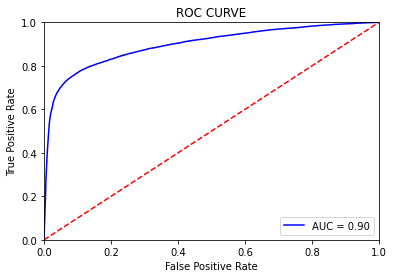

In [ ]:
y_pred = clf_xgb.predict(X_test)
make_con(y_pred,y_test)

proba = clf_xgb.predict_proba(X_test)
make_curve(proba,y_test)

In [ ]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 7.7 MB/s 
     |████████████████████████████████| 133 kB 58.2 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=bfc596c17df5197af73c3401d367955d41784edb98035a8dc4921c00d3d807ec
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is inco

# OLD customer

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0088 ± 0.0001,sessNum
0.0065 ± 0.0002,personalization_assignment
0.0063 ± 0.0001,notification_events
0.0052 ± 0.0001,engTime_sec
0.0046 ± 0.0004,interstitial_ad_events
0.0044 ± 0.0002,user_engagement
0.0021 ± 0.0001,bottom_option_click_event
0.0020 ± 0.0001,current_search_tab_event
0.0009 ± 0.0001,screen_view
0.0008 ± 0.0001,ham_burger_click_event


In [ ]:
in_app_experience = [
 'album_art_change_event',
 'bottom_mini_playing_bar_event',
 'bottom_option_click_event',
 'current_search_tab_event',
 'edit_tags_page_events',
 'equalizer_event',
 'font_change_event',
 'genres_page_event',
 'ham_burger_click_event',
 'inside_page_events',
 'list_item_clicked_event',
 'playing_window_event',
 'playlist_event',
 'settings_page_events',
 'theme_event',
 'top_tab_event',
 'widget_events',             
]

profile_visits = [
        'profile_page_events',
        'wellness_event',
]

special_features = [
      'floating_player_event',
      'lyrics_open_event',
      'lyrics_page_events',
      'mini_youtube_event',
      'ringtone_cutter_event',
      'voice_assistant_event',
      'youtube_event',
      'feature_popup_events',

]

notification_events = [
   'notification_events',
   'video_notification_event',                   
]

adsEvents = [
    'ad_close_event',    
    'remove_ads_purchase_event', 
]


app_event = [
       'app_exception',
       'app_clear_data',      
]



In [ ]:
df_final["sum_in_app_exp"] = df_final.loc[:,in_app_experience].sum(axis=1)
df_final["sum_special_features"] = df_final.loc[:,special_features].sum(axis=1)
df_final["sum_adsEvents"] = df_final.loc[:,adsEvents].sum(axis=1)
df_final["sum_notification_events"] = df_final.loc[:,notification_events].sum(axis=1)
df_final["sum_profile_visits"] = df_final.loc[:,profile_visits].sum(axis=1)
df_final["sum_app_event"] = df_final.loc[:,app_event].sum(axis=1)

df_final.drop(in_app_experience,axis=1,inplace=True)
df_final.drop(special_features,axis=1,inplace=True)
df_final.drop(notification_events,axis=1,inplace=True)
df_final.drop(adsEvents,axis=1,inplace=True)
df_final.drop("share",axis=1,inplace=True)
df_final.drop(app_event,axis=1,inplace=True)
df_final.drop(profile_visits,axis=1,inplace=True)

In [ ]:
X = df_final.drop("appRemove",axis=1)
y = df_final.appRemove

X.drop("user_pseudo_id",axis=1,inplace=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
print(len(y_train))
print(sum(y_train))
print(100*sum(y_train)/len(y_train))

105190
38084
36.20496244890199


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# define pipeline
smote = SMOTE(sampling_strategy=0.6)
under = RandomUnderSampler(sampling_strategy=0.7)
steps = [ ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X_train, y_train = pipeline.fit_resample(X_train, y_train)

In [ ]:
print(len(y_train))
print(sum(y_train))
print(100*sum(y_train)/len(y_train))

105190
38084
36.20496244890199


In [ ]:
from xgboost import XGBClassifier

In [ ]:
sns.set_style("darkgrid")

In [ ]:
# A parameter grid for XGBoost

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )


random_search.fit(X_train, y_train)


Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7f7e42f34050>,
                   estimator=XGBClassifier(learning_rate=0.02, n_estimators=600,
                                           nthread=1, silent=True),
                   n_iter=5, n_jobs=4,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.5, 1, 1.5, 2, 5],
                                        'max_depth': [3, 4, 5],
                                        'min_child_weight': [1, 5, 10],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=1001, scoring='roc_auc', verbose=3)

In [ ]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([100.248686  , 143.78080869, 128.24477522, 103.21149317,
        97.68719713]), 'std_fit_time': array([0.61095995, 8.68892151, 0.70409917, 0.52865307, 4.94050231]), 'mean_score_time': array([2.12545665, 2.7509021 , 2.70675508, 2.68419671, 1.17043447]), 'std_score_time': array([0.24432651, 0.02392255, 0.02383599, 0.11293036, 0.27096536]), 'param_subsample': masked_array(data=[1.0, 0.6, 0.8, 1.0, 0.8],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[5, 1, 5, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[3, 5, 5, 5, 4],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[5, 1.5, 1, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

clf_xgb=XGBClassifier(**random_search.best_params_)
kfold = KFold(n_splits=5, random_state=7,shuffle=True)
results = cross_val_score(clf_xgb, X_train, y_train, cv=kfold)

print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 85.88% (0.20%)


In [ ]:
clf_xgb=XGBClassifier(**random_search.best_params_)
model = clf_xgb.fit(X_train,y_train,verbose=False)

Confusion matrix : 
 [[13545  5371]
 [ 2031 30863]]
Outcome values : 
 30863 2031 5371 13545
Classification report : 
               precision    recall  f1-score   support

           1       0.87      0.72      0.79     18916
           0       0.85      0.94      0.89     32894

    accuracy                           0.86     51810
   macro avg       0.86      0.83      0.84     51810
weighted avg       0.86      0.86      0.85     51810



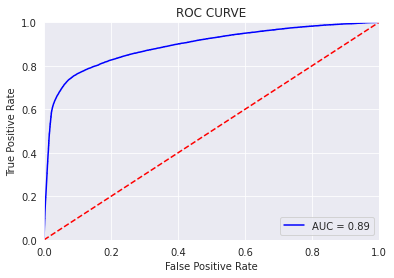

In [ ]:
y_pred = model.predict(X_test)
make_con(y_pred,y_test)

proba = model.predict_proba(X_test)
make_curve(proba,y_test)

##### Grid Search

In [ ]:
# GRID SEARCH FOR HYPER PARAMETER TUNING
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

logreg_new = LogisticRegression(random_state=1)
parameters = [{'penalty':['l1','l2'],
               'solver':['liblinear'],
               'tol':[0.01,0.1],
               'max_iter':[1000]
                },
              {
                'penalty':['l2','none'],
               'solver':['lbfgs'],
               'tol':[0.01,0.1],
               'max_iter':[1000]
              },
              {
                'penalty':['elasticnet'],
                'l1_ratio':[0.2,0.4],
               'solver':['saga'],
               'tol':[0.01,0.1],
               'max_iter':[1000]
              }
]



grid_search = GridSearchCV(estimator = logreg_new,  
                           param_grid = parameters,
                           scoring = ['roc_auc'],
                           refit = 'roc_auc',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearch CV best score : 0.8577


Parameters that give the best results : 

 {'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.1}


Estimator that was chosen by the search : 

 LogisticRegression(max_iter=1000, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.1)


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


logreg= LogisticRegression(**grid_search.best_params_)
kfold = KFold(n_splits=5, random_state=7,shuffle=True)
results = cross_val_score(logreg, X_train, y_train, cv=kfold)

print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 79.51% (0.91%)


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(**grid_search.best_params_)
model = logreg.fit(X_train,y_train)


Confusion matrix : 
 [[14467  4449]
 [ 6260 26634]]
Outcome values : 
 26634 6260 4449 14467
Classification report : 
               precision    recall  f1-score   support

           1       0.70      0.76      0.73     18916
           0       0.86      0.81      0.83     32894

    accuracy                           0.79     51810
   macro avg       0.78      0.79      0.78     51810
weighted avg       0.80      0.79      0.80     51810



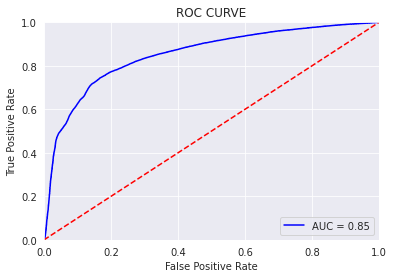

In [ ]:
y_pred = logreg.predict(X_test)
make_con(y_pred,y_test)

proba = logreg.predict_proba(X_test)
make_curve(proba,y_test)

In [ ]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 23.6 MB/s 
     |████████████████████████████████| 133 kB 38.5 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=526f969b385bfb533641ff8587437f4add1e569c0cb9c9a0d0c31c61f9a94d80
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is inc

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0927 ± 0.0006,sessNum
0.0441 ± 0.0013,interstitial_ad_events
0.0432 ± 0.0019,personalization_assignment
0.0233 ± 0.0015,engTime_sec
0.0127 ± 0.0006,sum_adsEvents
0.0116 ± 0.0007,screen_view
0.0105 ± 0.0018,sum_notification_events
0.0086 ± 0.0007,sum_special_features
0.0070 ± 0.0008,user_engagement
0.0025 ± 0.0008,sum_in_app_exp


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 8.6 MB/s 


In [ ]:
import shap
explainer = shap.TreeExplainer(clf_xgb)
shap_values = explainer.shap_values(X_test)

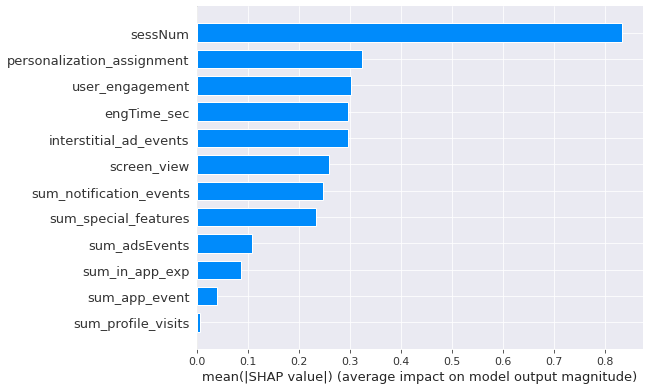

In [ ]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [ ]:
row_to_show = 3
data_for_prediction = X_test.iloc[row_to_show: row_to_show+1,:]


model.predict_proba(data_for_prediction)

array([[0.08486557, 0.91513443]], dtype=float32)

In [ ]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(model)

# Calculate Shap values
shap_values = explainer.shap_values(data_for_prediction)

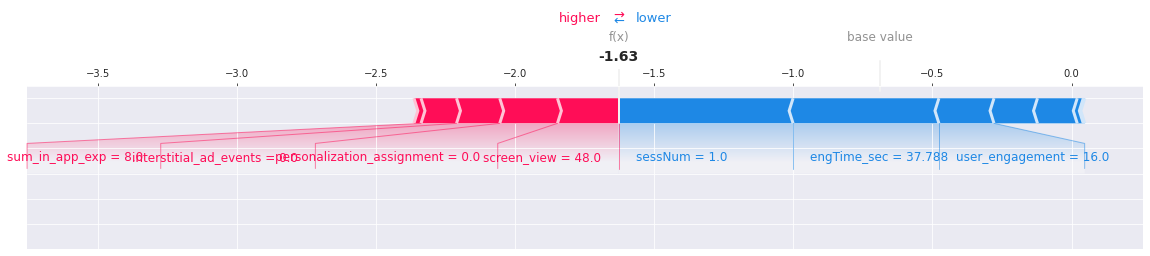

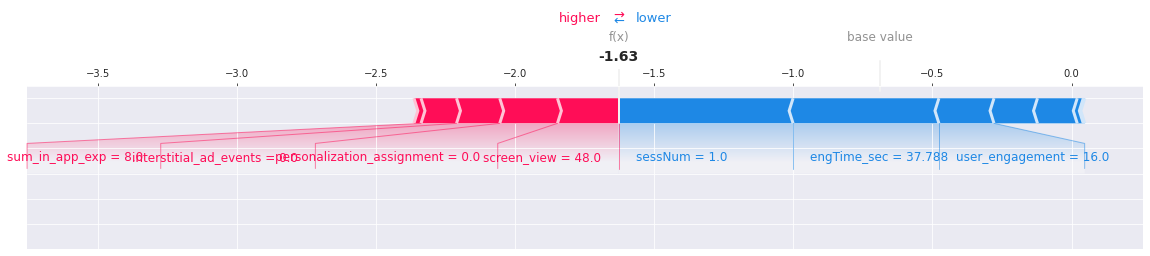

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, 
    shap_values[-1:], features=data_for_prediction.iloc[-1:], 
    feature_names=data_for_prediction.columns,
    matplotlib=True, show=False, plot_cmap=['#77dd77', '#f99191'])